# 13章：演習問題の解答

## はじめに

In [1]:
%pip install -q japanize-matplotlib-jlite py4macro
import japanize_matplotlib_jlite
import matplotlib.pyplot as plt
import pandas as pd
import py4macro
import statsmodels.formula.api as smf

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.1/4.1 MB 35.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 30.1 MB/s eta 0:00:00


## 演習1

### (1)

In [2]:
df = py4macro.data("jpn-yr")
df.columns

Index(['gdp', 'consumption', 'investment', 'government', 'exports', 'imports',
       'gdp_gap', 'deflator', 'inflation', 'unemployment_rate', 'employed',
       'population', 'gov_debt', 'gov_net_debt'],
      dtype='object')

### (2)

In [3]:
df["gdp_growth"] = 100*df["gdp"].pct_change()
df["u_change"] = df["unemployment_rate"].diff()

### (3)

In [4]:
formula = "gdp_growth ~ u_change"
okun = smf.ols(formula, data=df).fit()
print(okun.summary(slim=True))

                            OLS Regression Results                            
Dep. Variable:             gdp_growth   R-squared:                       0.194
Model:                            OLS   Adj. R-squared:                  0.174
No. Observations:                  44   F-statistic:                     10.08
Covariance Type:            nonrobust   Prob (F-statistic):            0.00280
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.6984      0.323      5.261      0.000       1.047       2.350
u_change      -3.1268      0.985     -3.175      0.003      -5.114      -1.140

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.


### (4)

In [5]:
ahat = okun.params["Intercept"]
bhat = okun.params["u_change"]

print(f"失業率が変化しない場合，GDPは平均で{ahat:.2f}%で成長する")
print(f"失業率0.1%上昇すると合，GDP成長率は平均で{-bhat:.2f}%低下する")

失業率が変化しない場合，GDPは平均で1.70%で成長する
失業率0.1%上昇すると合，GDP成長率は平均で3.13%低下する


### (5)

In [6]:
df["fitted_okun"] = okun.fittedvalues

### (6)

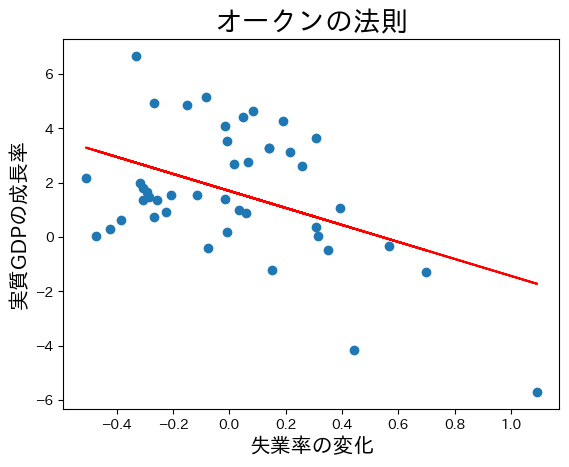

In [7]:
plt.scatter("u_change", "gdp_growth", data=df)
plt.plot("u_change", "fitted_okun", data=df, color="red")
plt.xlabel("失業率の変化", size=15)
plt.ylabel("実質GDPの成長率", size=15)
plt.title("オークンの法則", size=20)
plt.show()

## 演習2

### (1)

In [8]:
formula1 = "inflation ~ unemployment_rate"

### (2)

In [9]:
pc = smf.ols(formula1, data=df).fit()
print(pc.summary(slim=True))

                            OLS Regression Results                            
Dep. Variable:              inflation   R-squared:                       0.465
Model:                            OLS   Adj. R-squared:                  0.452
No. Observations:                  45   F-statistic:                     37.35
Covariance Type:            nonrobust   Prob (F-statistic):           2.52e-07
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             4.9112      0.658      7.467      0.000       3.585       6.238
unemployment_rate    -1.1477      0.188     -6.111      0.000      -1.526      -0.769

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.


### (3)

In [10]:
cf = pc.conf_int()
cf

,0,1
Intercept,3.584736,6.237643
unemployment_rate,-1.526402,-0.768938


In [11]:
print(f"下限：{cf.iloc[1,0]}")
print(f"上限：{cf.iloc[1,1]}")

下限：-1.5264017284338158
上限：-0.7689376845294581


### (4)

In [12]:
df["fitted_pc"] = pc.fittedvalues

### (5)

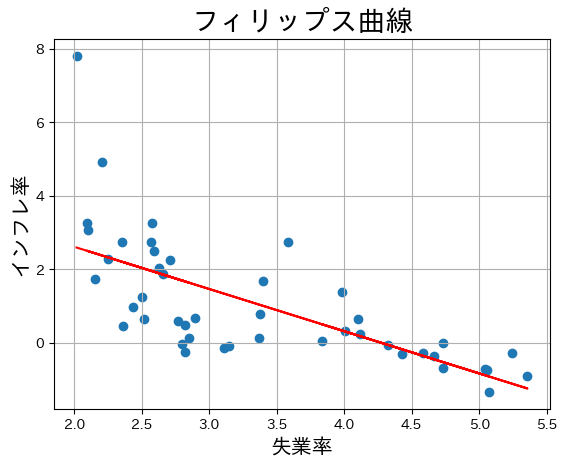

In [13]:
plt.scatter("unemployment_rate", "inflation", data=df)
plt.plot("unemployment_rate", "fitted_pc", data=df, color="red")
plt.xlabel("失業率", size=15)
plt.ylabel("インフレ率", size=15)
plt.title("フィリップス曲線", size=20)
plt.grid()
plt.show()